# 🔷 Modelo Entidade-Relacionamento (ER)

## ✨ Descrição do Domínio

Uma loja registra vendas realizadas por clientes, onde cada venda está associada a um produto e a um cliente. Queremos analisar os fatores que influenciam o **valor total da venda**.

---

## 🧱 Entidades e Atributos

### **Cliente**
- `id_cliente` (PK)
- `nome`
- `idade`
- `cidade`

### **Produto**
- `id_produto` (PK)
- `nome`
- `categoria`
- `preco`

### **Venda**
- `id_venda` (PK)
- `id_cliente` (FK → Cliente)
- `id_produto` (FK → Produto)
- `quantidade`
- `data`
- `total_venda` *(calculado)*

---

## 🔄 Relacionamentos

- **Cliente** realiza **Venda**
- **Produto** está presente em **Venda**

Cada venda está relacionada a **um único cliente** e **um único produto**, mas:

- Um cliente pode fazer **várias vendas**
- Um produto pode estar presente em **várias vendas**


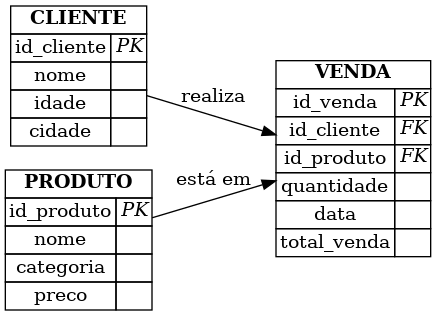

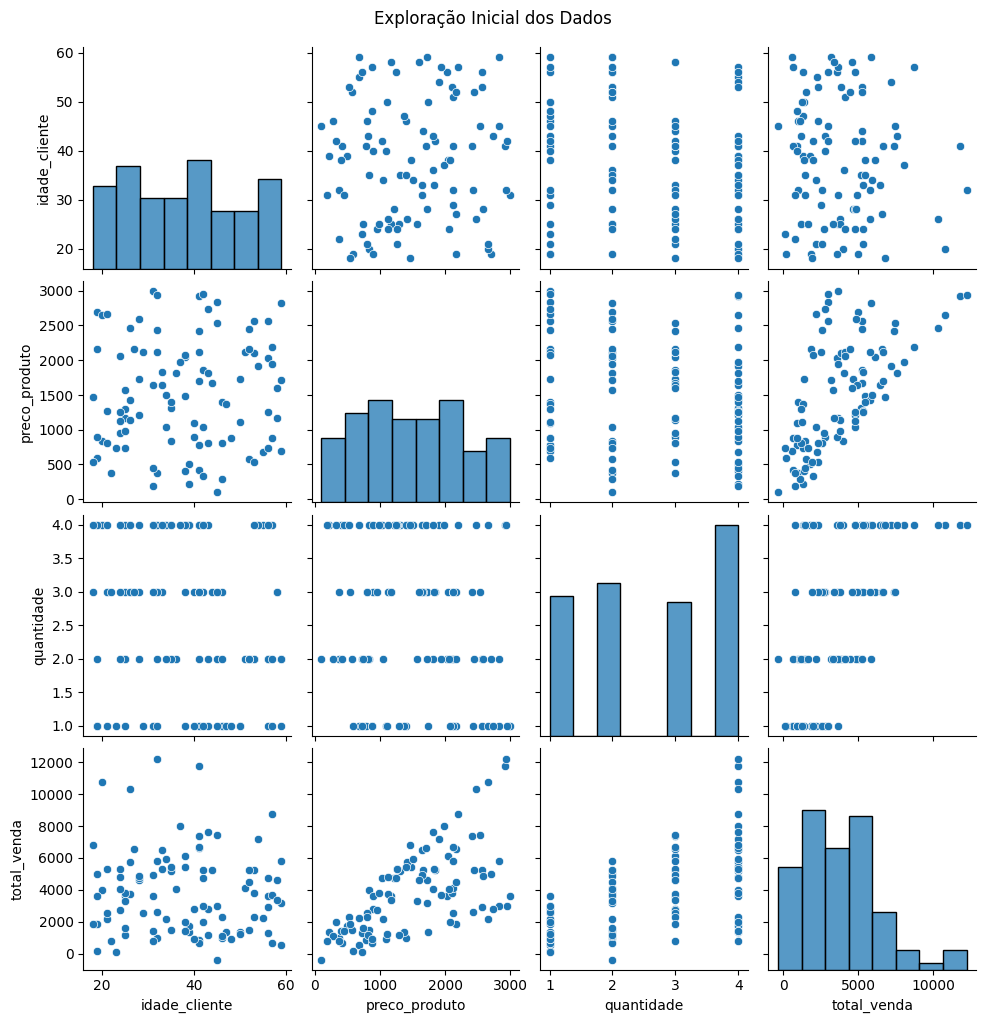

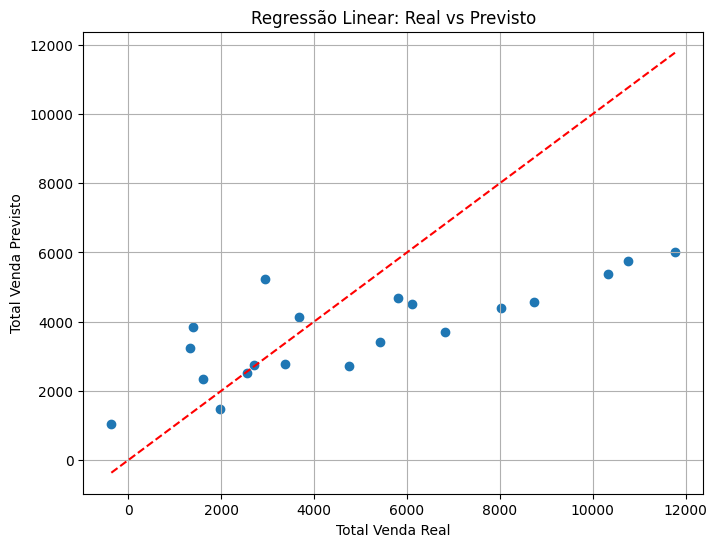

(array([-10.39245226,   1.75343504]),
 np.float64(1322.0048019448463),
 7639381.956620877,
 0.33975127268757566)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Criando dados fictícios
np.random.seed(42)
n = 100

# Simula dados dos clientes
idade = np.random.randint(18, 60, size=n)

# Simula dados dos produtos
preco_produto = np.random.uniform(100, 3000, size=n)

# Quantidade vendida (influenciada por idade e preço)
quantidade = np.random.randint(1, 5, size=n)

# Valor total da venda
total_venda = preco_produto * quantidade + np.random.normal(0, 300, size=n)

# Criando DataFrame
df = pd.DataFrame({
    'idade_cliente': idade,
    'preco_produto': preco_produto,
    'quantidade': quantidade,
    'total_venda': total_venda
})

# Visualização
sns.pairplot(df)
plt.suptitle("Exploração Inicial dos Dados", y=1.02)
plt.show()

# Regressão Linear
X = df[['idade_cliente', 'preco_produto']]
y = df['total_venda']

# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Previsão
y_pred = model.predict(X_test)

# Avaliação
coeficientes = model.coef_
intercepto = model.intercept_
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualizando os resultados
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Total Venda Real")
plt.ylabel("Total Venda Previsto")
plt.title("Regressão Linear: Real vs Previsto")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid()
plt.show()

coeficientes, intercepto, mse, r2
